## Modules

Sometimes creating a single function is not enough and it can be quite tedious to call each function separately.
In order to avoid this annoying problem functions can be put in modules. So instead of calling each function seperately you can simply import a module like "math" to get immediate access to many different functions. in the Next part of this tutorial we will have look at a super useful Module called pandas.


   Unfortunately, working with DataFrames is NOT part of Python itself. However,
   Python can be extended using so-called "packages/modules".
   In order to use packages/modules, we need to

   1. Install them. In your case, this is irrelevant as the script you are running here already installs everything.
      But if you want to do some proper analysis at home you need to install the packages using conda or pip
   2. Import the packages you actually need in your script. This is done
      with the import statement.

The package we need for working with dataframes is called pandas. There is a
convention to "rename" it in scripts, this is what the "as pd" part is for:

In [16]:
import pandas as pd

Now we can use all the functions of pandas in our script. You can take a look at the official documentation here: https://pandas.pydata.org/pandas-docs/version/1.0.1/index.html to see what you can do with it. I will just give a few examples here.

The first thing we need to do is get some data: 
  Conveniently, as long as the data is in 2D Format you can easily load it in pandas! Just type "pd.read_" and hit the tab key to see the option for the different filetypes you can even read data from a webpage directly or spss formatted files ;)

In [50]:
df_gdp = pd.read_html('https://en.wikipedia.org/wiki/Economy_of_the_United_States', match='Year')[0]

In [51]:
df_gdp.head()

,Year,GDP (in Bil. US$PPP),GDP per capita (in US$ PPP),GDP (in Bil. US$nominal),GDP per capita (in US$ nominal),GDP growth (real),Inflation rate (in Percent),Unemployment (in Percent),Government debt (in % of GDP)
0,1980,2857.3,12552.9,2857.3,12552.9,-0.3%,13.5%,7.2%,NaN
1,1981,3207.0,13948.7,3207.0,13948.7,2.5%,10.4%,7.6%,NaN
2,1982,3343.8,14405.0,3343.8,14405.0,-1.8%,6.2%,9.7%,NaN
3,1983,3634.0,15513.7,3634.0,15513.7,4.6%,3.2%,9.6%,NaN
4,1984,4037.7,17086.4,4037.7,17086.4,7.2%,4.4%,7.5%,NaN


In [52]:
df_gdp.columns

Index(['Year', 'GDP (in Bil. US$PPP)', 'GDP per capita (in US$ PPP)',
       'GDP (in Bil. US$nominal)', 'GDP per capita (in US$ nominal)',
       'GDP growth (real)', 'Inflation rate (in Percent)',
       'Unemployment (in Percent)', 'Government debt (in % of GDP)'],
      dtype='object')

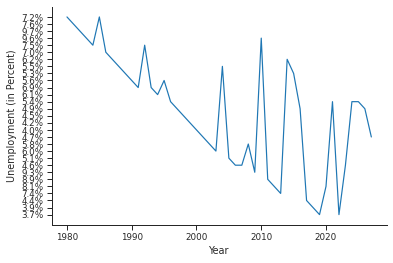

In [53]:
#Now lets plot some data
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks')
sns.set_context('paper')

sns.lineplot(data=df_gdp, x='Year', y='Unemployment (in Percent)')
sns.despine()

## Whats going on here?

We wanted to show unemployment in percent but the y-axis looks a bit strange..
Has anyone an idea what went wrong?


In [47]:
#drop 5 signs and recode all to float
#this line of code is ok here because its all numerical data -> will be problematic if you have non numerical data
for cur_column in df_gdp.columns:
    
    df_gdp[cur_column] = df_gdp[cur_column].replace({'%': ''}, regex=True).astype('float')


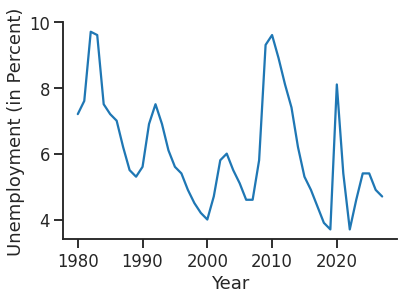

In [48]:
sns.lineplot(data=df_gdp, x='Year', y='Unemployment (in Percent)')
sns.despine()

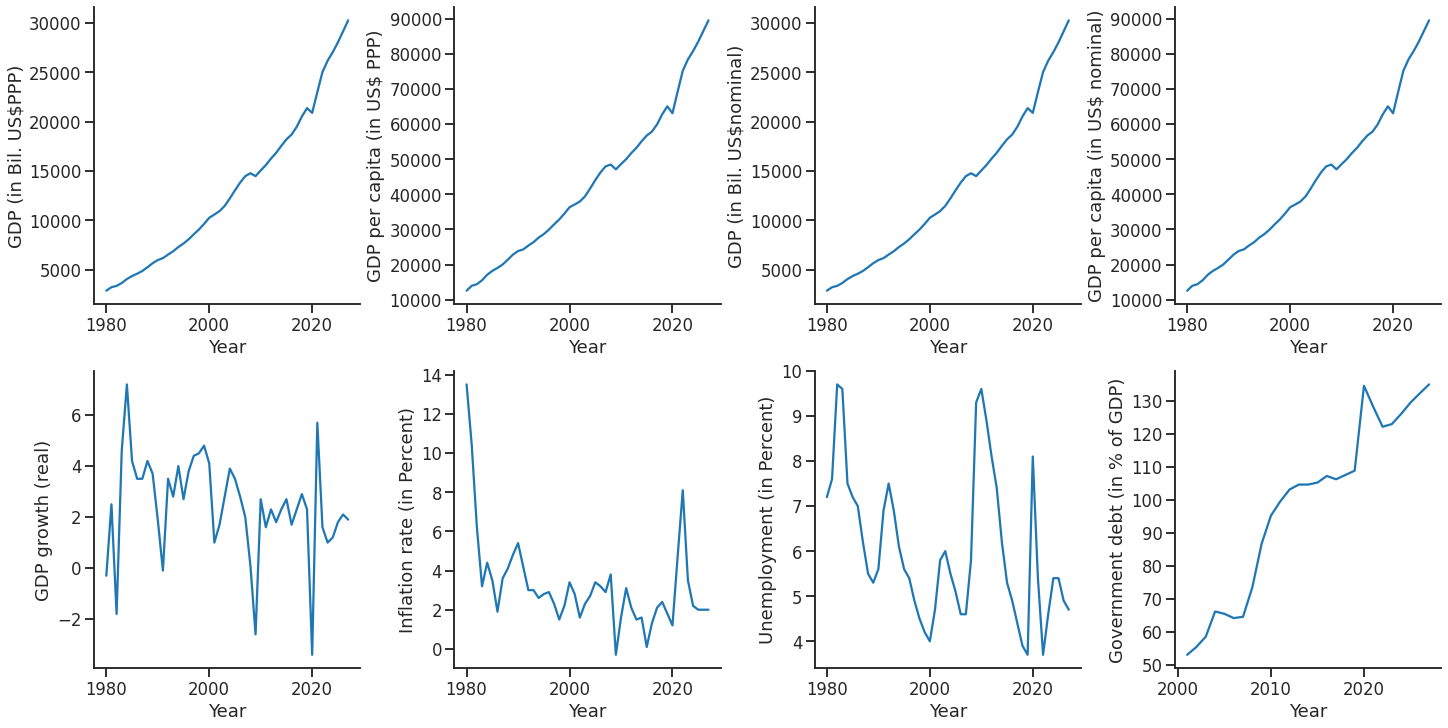

In [11]:
sns.set_context('talk')

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20,10), constrained_layout=True)
cols = df_gdp.columns.to_list()[1:]

for col, ax in zip(cols, axs.flat):
  sns.lineplot(data=df_gdp, x='Year', y=col, ax=ax)
  sns.despine()



## Stats o'clock

In Python you can also do statistics. There are a couple different packages to do that. Most of them build on scipy the main library for scientific computing in python (https://docs.scipy.org/doc/scipy/getting_started.html). However scipy is not always easy to use, if you are just getting started.. 

Therefore it may be sometimes more convenient to take a simpler option. One of the most straightforward to use packages that offers a lot of basic statistical models is pingouin (https://pingouin-stats.org/index.html).



In [22]:
#!pip install pingouin==0.5
#!pip install scipy==0.18

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
#lets do some stats
import pingouin as pg

In [139]:
#Read some basic data on top 10 netflix shows throughout the pandemic
df = pd.read_csv('./data/netflix_daily_top_10.csv')
df.head(10)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
5,2020-04-01,6,6,-,Car Masters: Rust to Riches,TV Show,Yes,"Sep 14, 2018",4,14
6,2020-04-01,7,10,-,Unorthodox,TV Show,Yes,"Mar 26, 2020",2,5
7,2020-04-01,8,7,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",9,40
8,2020-04-01,9,8,-,Badland,Movie,NaN,"Mar 26, 2020",4,11
9,2020-04-01,10,9,-,Uncorked,Movie,Yes,"Mar 27, 2020",4,15


## Getting an overview of our data

When getting a new dataset we first want to gather some information on what data was collected. 
To get a first overview of our pandas dataframe you can use

    df.info() 
    
This will give you general information about the dataframe such as the datatype per column etc.

Do you notice anything weird about one of the data columns? 

Also the data type of some columns could be made more informative. So lets do some preprocessing

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [141]:
#first lets deal with the NaNs in the Netflix exclusive (be careful when assigning a value to a NaN - NaNs are usually NaNs for a good reason!!!)
import numpy as np #numpy is a module for matrix operations in python
df['Netflix Exclusive'] = df['Netflix Exclusive'].replace(np.nan, 'No')

#The "As of" column is an object but is probably better turned into a datetime object
df['As of'] = pd.to_datetime(df['As of'])
df['Netflix Release Date'] = pd.to_datetime(df['Netflix Release Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   As of                 7100 non-null   datetime64[ns]
 1   Rank                  7100 non-null   int64         
 2   Year to Date Rank     7100 non-null   object        
 3   Last Week Rank        7100 non-null   object        
 4   Title                 7100 non-null   object        
 5   Type                  7100 non-null   object        
 6   Netflix Exclusive     7100 non-null   object        
 7   Netflix Release Date  7100 non-null   datetime64[ns]
 8   Days In Top 10        7100 non-null   int64         
 9   Viewership Score      7100 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 554.8+ KB


## Visualize it!

A good way to get a feel for the data you are dealing with is to visualize it.
Pandas offers some visualization functions, but you can also either use matplotlib or seaborn.

To get things started try to do a pointplot in seaborn with "Days In Top 10" on the y-axis and "As of" on the y-axis. Do we notice sth strange?

<AxesSubplot:xlabel='As of', ylabel='Days In Top 10'>

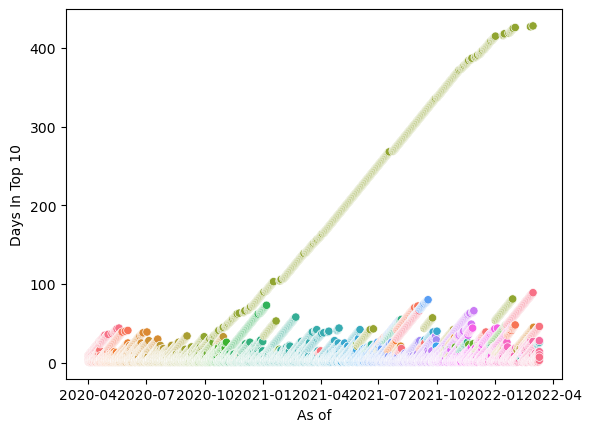

In [158]:
sns.scatterplot(data=df, x='As of', y='Days In Top 10', hue='Title', legend=False)

## Lets find out what type of tv-show was the longest in the top 10 in a given year?

We clearly see that there is one outlier. Lets find out what show it is and how it impacts our yearly measurements.

In [144]:
df['year'] = df['As of'].dt.strftime('%Y') #extract the year and add it as a new column

#here we use pythons functional api () to pipe method calls
(df[['year', 'Days In Top 10', 'Type', 'Title']] # we can (but dont need to) use a list to select only columns of interest
   .query('Type == "TV Show"') #queries can be used to filter a or multiple specific column values
   .groupby('year') #groupby groups the dataframe according to one or multiple categories (if you are using multiple categories you need to input them as a list)
   .apply(lambda df: df.loc[df['Days In Top 10'].idxmax()])# get the show that was longest in the top 10 
)

,year,Days In Top 10,Type,Title
year,,,,
2020,2020,88,TV Show,Cocomelon
2021,2021,414,TV Show,Cocomelon
2022,2022,428,TV Show,Cocomelon


Its "Cocomelon" which seems to be a very popular childrens show. Lets discard it for now as it biases our output and we maybe dont care too much about childrens shows and its a good way to see how we can drop variables in pandas

In [149]:
#we can either use a pandas query
df_tidy = df.query('Title != "Cocomelon"')

In [150]:
(df_tidy[['year', 'Days In Top 10', 'Type', 'Title']] # we can (but dont need to) use a list to select only columns of interest
   .query('Type == "TV Show"') #queries can be used to filter a or multiple specific column values
   .groupby('year') #groupby groups the dataframe according to one or multiple categories (if you are using multiple categories you need to input them as a list)
   .apply(lambda df_tidy: df_tidy.loc[df_tidy['Days In Top 10'].idxmax()])# get the show that was longest in the top 10 
)

,year,Days In Top 10,Type,Title
year,,,,
2020,2020,67,TV Show,The Queenâs Gambit
2021,2021,80,TV Show,Manifest
2022,2022,89,TV Show,Ozark


In [156]:
#lets split this by year and movie
show_type_list = ['TV Show', 'Movie']

#here we use pythons functional api () to pipe method calls
(df_tidy[['year', 'Days In Top 10', 'Type', 'Title', 'Netflix Exclusive']] # we can (but dont need to) use a list to select only columns of interest
   .query('Type == @show_type_list') #using the @ operator in a query allows us to query lists
   .groupby(['Type', 'year'],  sort=False) #if you are using multiple categories you need to input them as a list. This will return a multiindex dataframe
   .apply(lambda df_tidy: df_tidy.loc[df_tidy['Days In Top 10'].idxmax()])[['Title', 'Days In Top 10', 'Netflix Exclusive']]
)

,,Title,Days In Top 10,Netflix Exclusive
Type,year,,,
TV Show,2020,The Queenâs Gambit,67,Yes
Movie,2020,How the Grinch Stole Christmas,29,No
TV Show,2021,Manifest,80,No
Movie,2021,The Mitchells vs. The Machines,31,Yes
TV Show,2022,Ozark,89,Yes
Movie,2022,Despicable Me 2,27,No


In [163]:
df_tidy

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score,year
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,9,90,2020
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,2017-07-21,5,45,2020
2,2020-04-01,3,3,2,All American,TV Show,No,2019-03-28,9,76,2020
3,2020-04-01,4,4,-,Blood Father,Movie,No,2020-03-26,5,30,2020
4,2020-04-01,5,5,4,The Platform,Movie,Yes,2020-03-20,9,55,2020
...,...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,2022-03-01,10,81,2022
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,2022-02-25,14,100,2022
7097,2022-03-11,8,8,-,Shooter,Movie,No,2014-08-01,3,7,2022
7098,2022-03-11,9,9,7,Shrek 2,Movie,No,2022-03-01,10,33,2022


## Does Netflix push its exclusive Titles?

It sometimes feels like you see a lot more often title in the Top 10 that are directly Netflix related. But is this really the case?

Try to process the data accordingly and find out. ;)

Consider the following:

There are multiple rows per title. We just want the maximum number of days that a title was part of the top 10


In [206]:
df_exclusive = 

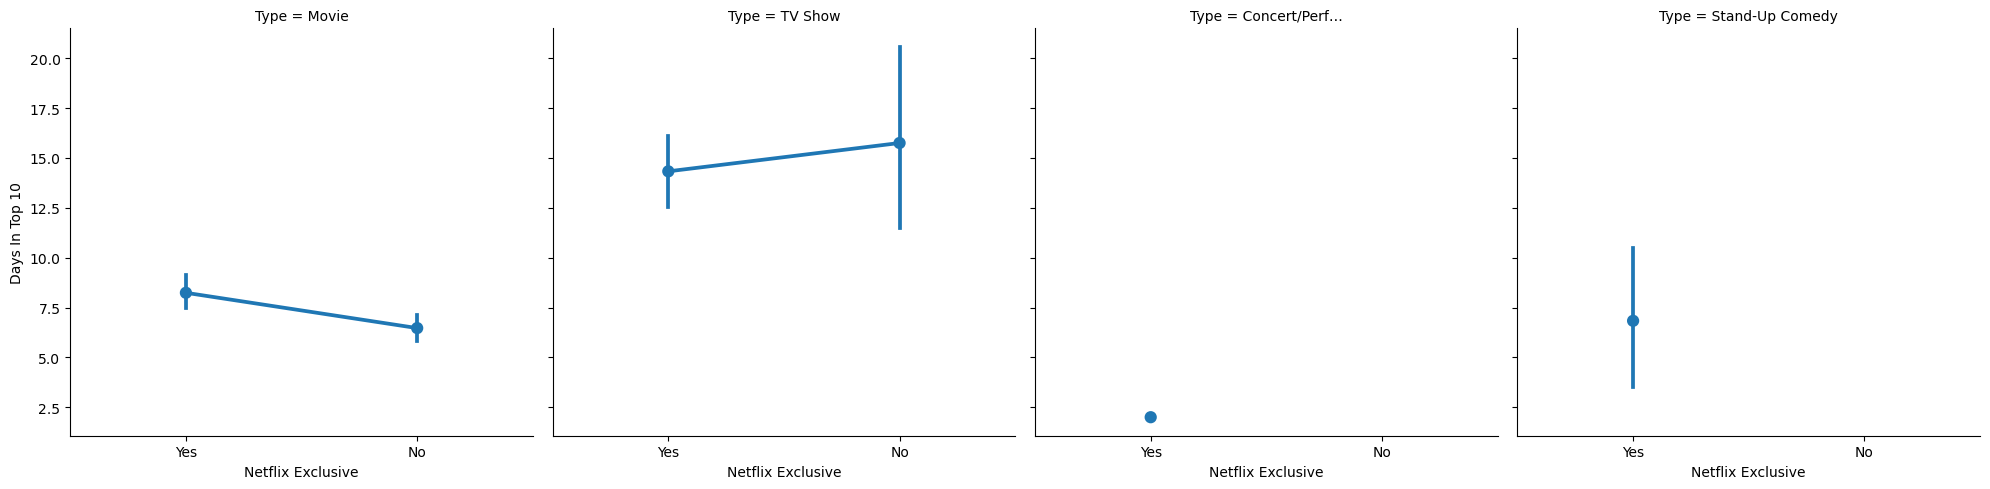

In [172]:
sns.catplot(data=df_exclusive, x='Netflix Exclusive', y='Days In Top 10', kind='point', col='Type')

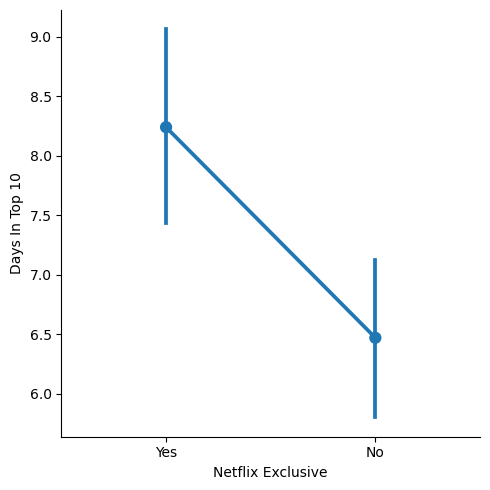

In [204]:
df_movie = df_exclusive.query('Type == "Movie"')
sns.catplot(data=df_movie, x='Netflix Exclusive', y='Days In Top 10', kind='point')

In [205]:
#lets save that data for further statistical processing
df_movie.to_csv('./data/netflix_preprocessed.csv')

In [179]:
import pingouin as pg

(array([43., 57., 46., 20.,  2.,  2.,  1.,  1.,  1.,  2.]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <BarContainer object of 10 artists>)

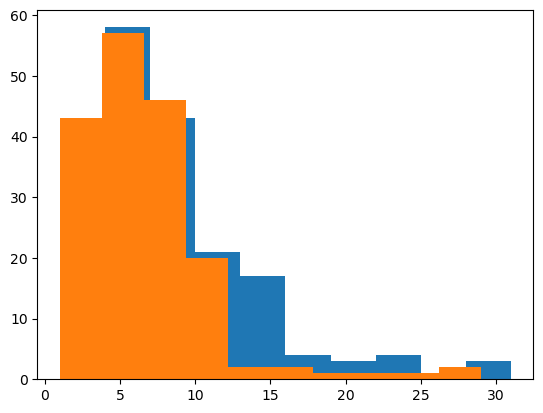

In [189]:
plt.hist(df_movie[df_movie['Netflix Exclusive'] == "Yes"]['Days In Top 10'])
plt.hist(df_movie[df_movie['Netflix Exclusive'] == "No"]['Days In Top 10'])

In [ ]:
np.unique(df_movie['Netflix Exclusive'], return_counts=True)

In [193]:
pd.concat([pg.normality(df_movie[df_movie['Netflix Exclusive'] == "Yes"]['Days In Top 10']),
           pg.normality(df_movie[df_movie['Netflix Exclusive'] == "No"]['Days In Top 10'])])

,W,pval,normal
Days In Top 10,0.863499,1.132679e-11,False
Days In Top 10,0.842643,1.860699e-12,False


In [190]:
pg.mwu(df_movie[df_movie['Netflix Exclusive'] == "Yes"]['Days In Top 10'],
         df_movie[df_movie['Netflix Exclusive'] == "No"]['Days In Top 10']
         )

,U-val,alternative,p-val,RBC,CLES
MWU,18754.5,two-sided,0.001819,-0.190762,0.595381


In [203]:
pg.ancova(data=df_movie, dv='Days In Top 10', between='Netflix Exclusive', covar='Viewership Score')

,Source,SS,DF,F,p-unc,np2
0,Netflix Exclusive,97.866340,1,27.800469,2.352367e-07,0.073198
1,Viewership Score,7889.154912,1,2241.038220,1.049511e-154,0.864252
2,Residual,1239.150008,352,NaN,NaN,NaN
